Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


uint8


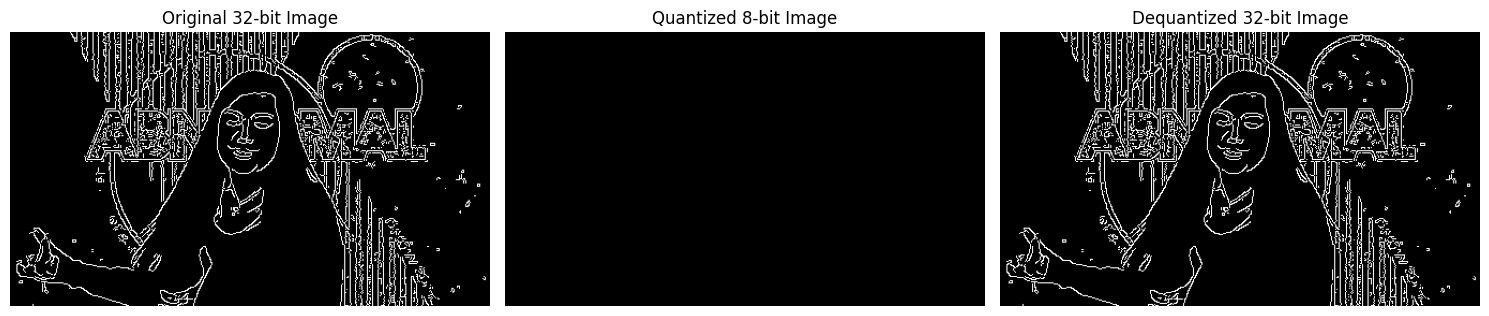

Size of original image: 22017 bytes
Size of quantized image: 22017 bytes
Size of dequantized image: 22017 bytes


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

def quantize_to_8bit(image):
    """Convert a 32-bit image to 8-bit."""
    image_8bit = (image / 255).astype(np.uint8)
    return image_8bit

def dequantize_to_32bit(image_8bit):
    """Convert an 8-bit image back to 32-bit."""
    image_32bit = image_8bit.astype(np.float32) * 255
    return image_32bit

def show_images(original, quantized, dequantized):
    """Display the original, quantized, and dequantized images."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original 32-bit Image')
    axes[0].axis('off')
    
    axes[1].imshow(cv2.cvtColor(quantized, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Quantized 8-bit Image')
    axes[1].axis('off')
    
    axes[2].imshow(cv2.cvtColor(dequantized, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Dequantized 32-bit Image')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

def print_image_size(filepath, description):
    """Print the size of the image."""
    size = os.path.getsize(filepath)
    print(f"Size of {description}: {size} bytes")

def save_image(image, path):
    """Save the image to the specified path."""
    cv2.imwrite(path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

def main():
    # Load a sample 32-bit image
    image_path = 'data/00096_0576_processed/im4_canny.png'  # Change to your image path
    # original_image = cv2.imread(image_path).astype(np.float32)
    original_image = cv2.imread(image_path)
    print(original_image.dtype)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Quantize to 8-bit
    quantized_image = quantize_to_8bit(original_image)

    # Dequantize back to 32-bit
    dequantized_image = dequantize_to_32bit(quantized_image)

    # Show images
    show_images(original_image, quantized_image, dequantized_image)

    # Save the quantized image
    quantized_image_path = 'quantized_image.png'
    save_image(quantized_image, quantized_image_path)

    # Save the dequantized image
    dequantized_image_path = 'dequantized_image.png'
    save_image(dequantized_image, dequantized_image_path)

    # Print sizes of images
    print_image_size(image_path, 'original image')
    print_image_size(quantized_image_path, 'quantized image')
    print_image_size(dequantized_image_path, 'dequantized image')

if __name__ == "__main__":
    main()



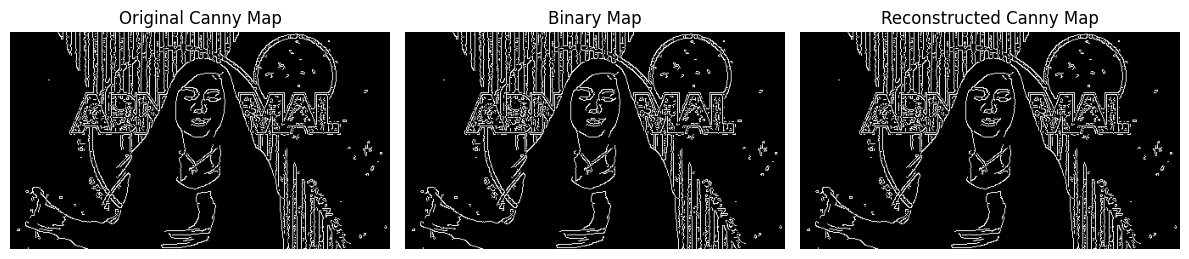

Size of original image: 10755 bytes
Size of binary image: 10755 bytes
Size of reconstructed image: 10755 bytes


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def binarize_canny(canny_map):
    """Binarize a Canny edge map."""
    binary_map = np.where(canny_map > 0, 1, 0).astype(np.uint8) * 255
    return binary_map

def reconstruct_from_binary(binary_map_path, shape):
    """Reconstruct the original Canny map from a binary map."""
    binary_map = cv2.imread(binary_map_path, cv2.IMREAD_GRAYSCALE)
    reconstructed_map = (binary_map // 255) * 255
    return reconstructed_map

def get_file_size(file_path):
    """Get the size of a file in bytes."""
    return os.path.getsize(file_path)

def main():
    # Load a Canny edge map
    canny_map = cv2.imread('data/00096_0576_processed/im1_canny.png', cv2.IMREAD_GRAYSCALE)
    
    # Binarize the Canny map
    binary_map = binarize_canny(canny_map)
    
    # Save the binary map as a PNG file
    binary_path = 'binary_map.png'
    cv2.imwrite(binary_path, binary_map)
    
    # Reconstruct the original map from the binary map
    reconstructed_map = reconstruct_from_binary(binary_path, canny_map.shape)
    
    # Show the images
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.title('Original Canny Map')
    plt.imshow(canny_map, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title('Binary Map')
    plt.imshow(binary_map, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title('Reconstructed Canny Map')
    plt.imshow(reconstructed_map, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Save the original and reconstructed maps
    original_path = 'original_canny_map.png'
    reconstructed_path = 'reconstructed_map.png'
    
    cv2.imwrite(original_path, canny_map)
    cv2.imwrite(reconstructed_path, reconstructed_map)

    # Print file sizes
    original_size = get_file_size(original_path)
    binary_size = get_file_size(binary_path)
    reconstructed_size = get_file_size(reconstructed_path)

    print(f"Size of original image: {original_size} bytes")
    print(f"Size of binary image: {binary_size} bytes")
    print(f"Size of reconstructed image: {reconstructed_size} bytes")

if __name__ == "__main__":
    main()
